In [1]:
from torchvision.datasets import MNIST, FashionMNIST
from torchvision import transforms

fmnist_train = FashionMNIST("./data", train=True, download=True,
                           transform=transforms.ToTensor())
fmnist_test = FashionMNIST("./data", train=False, download=True,
                           transform=transforms.ToTensor())

mnist_train = MNIST("./data", train=True, download=True,
                    transform=transforms.ToTensor())
mnist_test = MNIST("./data", train=False, download=True,
                    transform=transforms.ToTensor())

batch_size=256
from torch.utils.data import Dataset, DataLoader, TensorDataset
f_train_loader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
f_test_laoder = DataLoader(fmnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

m_train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
m_test_laoder = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

In [2]:
from models.load_models import MyMLP, MyCNN, Net, NetWidth, NetDropout, NetBatchNorm, NetDepth

model = MyMLP()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list
print('MyMLP: ', sum(numel_list), numel_list)

model = MyCNN(height=28, width=28)
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list
print('MyCNN: ', sum(numel_list), numel_list)

model = Net(height=28, width=28)
numel_list = [p.numel() for p in model.parameters()]
print('Net: ', sum(numel_list), numel_list)

model = NetWidth(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetWidth: ', sum(numel_list), numel_list)

model = NetDropout(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetDropout: ', sum(numel_list), numel_list)

model = NetBatchNorm(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetBatchNorm: ', sum(numel_list), numel_list)

model = NetDepth(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetDepth: ', sum(numel_list), numel_list)

MyMLP:  2778 [2048, 32, 512, 16, 160, 10]
MyCNN:  123222 [400, 16, 12800, 32, 51200, 64, 57600, 100, 1000, 10]
Net:  14226 [144, 16, 1152, 8, 12544, 32, 320, 10]
NetWidth:  30394 [288, 32, 4608, 16, 25088, 32, 320, 10]
NetDropout:  30394 [288, 32, 4608, 16, 25088, 32, 320, 10]
NetBatchNorm:  30490 [288, 32, 32, 32, 4608, 16, 16, 16, 25088, 32, 320, 10]
NetDepth:  12234 [288, 32, 4608, 16, 2304, 16, 4608, 32, 320, 10]


In [3]:
import torch
from torch import nn, optim
from train.run_training import training_loop, training_loop_l2reg, validate
import collections
all_acc_dict = collections.OrderedDict()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import datetime
current_time = datetime.datetime.today() # 2021-08-15 20:58:43.302125
current_time = current_time.strftime('%Y%m%d%H%M%S') # 20210815205827

In [4]:
model = Net(height=28, width=28).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["Net"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_Net.pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 33.94it/s]


0 2.292477931075853 0.17923677884615385 0.34905850887298584


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 48.25it/s]


1 2.136828670685895 0.4910189636752137 0.5986578464508057


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 48.00it/s]


2 1.6200616288082794 0.6213942307692307 0.6822916865348816


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 48.42it/s]


3 1.1195720933025999 0.7309361645299145 0.7845553159713745


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 48.35it/s]


4 0.8423147746421749 0.8056223290598291 0.8433493971824646


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 48.26it/s]


5 0.6790767168794067 0.8438000801282052 0.8658854365348816


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 48.15it/s]


6 0.5733461685702524 0.8647669604700855 0.8825120329856873


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 48.08it/s]


7 0.5007545707563474 0.8796574519230769 0.8918269276618958


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:04<00:00, 47.98it/s]


8 0.4481652343222 0.8900741185897436 0.8996394276618958


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 46.39it/s]


9 0.40785012787503744 0.8973357371794872 0.9061498641967773
-----------training finished-----------
train_losses:  [2.292477931075853, 2.136828670685895, 1.6200616288082794, 1.1195720933025999, 0.8423147746421749, 0.6790767168794067, 0.5733461685702524, 0.5007545707563474, 0.4481652343222, 0.40785012787503744]
train_acc:  [0.17923677884615385, 0.4910189636752137, 0.6213942307692307, 0.7309361645299145, 0.8056223290598291, 0.8438000801282052, 0.8647669604700855, 0.8796574519230769, 0.8900741185897436, 0.8973357371794872]
val_acc:  [0.34905850887298584, 0.5986578464508057, 0.6822916865348816, 0.7845553159713745, 0.8433493971824646, 0.8658854365348816, 0.8825120329856873, 0.8918269276618958, 0.8996394276618958, 0.9061498641967773]
Accuracy train: 0.90
Accuracy val: 0.91


In [5]:
model = MyCNN(height=28, width=28).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["MyCNN"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_MyCNN.pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 38.81it/s]


0 2.299654113376601 0.19270833333333334 0.28806090354919434


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 38.65it/s]


1 1.7790955473936678 0.5540531517094017 0.7872596383094788


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 40.11it/s]


2 0.5373487178348165 0.8355535523504274 0.8826121687889099


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 40.58it/s]


3 0.35757035925152986 0.890357905982906 0.9162660241127014


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 40.30it/s]


4 0.2830883669367164 0.9128772702991453 0.9336939454078674


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 37.88it/s]


5 0.22920427164422597 0.9306223290598291 0.9370993971824646


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 36.98it/s]


6 0.19208576827601814 0.9415564903846154 0.9524238705635071


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 39.55it/s]


7 0.16554741193680292 0.9496861645299145 0.9598357677459717


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 36.93it/s]


8 0.1459069361054846 0.955612313034188 0.9602363705635071


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 36.96it/s]


9 0.13144445615968478 0.9596688034188035 0.9644431471824646
-----------training finished-----------
train_losses:  [2.299654113376601, 1.7790955473936678, 0.5373487178348165, 0.35757035925152986, 0.2830883669367164, 0.22920427164422597, 0.19208576827601814, 0.16554741193680292, 0.1459069361054846, 0.13144445615968478]
train_acc:  [0.19270833333333334, 0.5540531517094017, 0.8355535523504274, 0.890357905982906, 0.9128772702991453, 0.9306223290598291, 0.9415564903846154, 0.9496861645299145, 0.955612313034188, 0.9596688034188035]
val_acc:  [0.28806090354919434, 0.7872596383094788, 0.8826121687889099, 0.9162660241127014, 0.9336939454078674, 0.9370993971824646, 0.9524238705635071, 0.9598357677459717, 0.9602363705635071, 0.9644431471824646]
Accuracy train: 0.96
Accuracy val: 0.96


In [6]:
model = NetWidth(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["NetWidth"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetWidth.pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.35it/s]


0 2.2478351848831504 0.2724358974358974 0.5551882982254028


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.39it/s]


1 1.7346427430410754 0.6319945245726496 0.7486979365348816


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.06it/s]


2 1.0865323397734645 0.7729200053418803 0.8226162195205688


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.44it/s]


3 0.7746073202002202 0.8263555021367521 0.8557692170143127


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.09it/s]


4 0.617664974390693 0.8541332799145299 0.8763021230697632


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.11it/s]


5 0.5242399464605192 0.8736478365384616 0.8898237347602844


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.09it/s]


6 0.46127035881316714 0.8860176282051282 0.8990384936332703


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.15it/s]


7 0.4144935621979922 0.8958834134615384 0.9051482677459717


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.09it/s]


8 0.3779141865830565 0.9044638087606838 0.9136618971824646


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.32it/s]


9 0.3479917934524143 0.9114082532051282 0.9194711446762085
-----------training finished-----------
train_losses:  [2.2478351848831504, 1.7346427430410754, 1.0865323397734645, 0.7746073202002202, 0.617664974390693, 0.5242399464605192, 0.46127035881316714, 0.4144935621979922, 0.3779141865830565, 0.3479917934524143]
train_acc:  [0.2724358974358974, 0.6319945245726496, 0.7729200053418803, 0.8263555021367521, 0.8541332799145299, 0.8736478365384616, 0.8860176282051282, 0.8958834134615384, 0.9044638087606838, 0.9114082532051282]
val_acc:  [0.5551882982254028, 0.7486979365348816, 0.8226162195205688, 0.8557692170143127, 0.8763021230697632, 0.8898237347602844, 0.8990384936332703, 0.9051482677459717, 0.9136618971824646, 0.9194711446762085]
Accuracy train: 0.91
Accuracy val: 0.92


In [7]:
model = NetWidth(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop_l2reg(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["l2 reg"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetWidth(l2 reg).pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.10it/s]


0 2.296940499620888 0.28318643162393164 0.5650039911270142


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 40.19it/s]


1 1.8569251032857936 0.5951021634615384 0.6625601053237915


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.97it/s]


2 1.2166538612013722 0.7385149572649573 0.8141025900840759


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.68it/s]


3 0.8568814148718708 0.8324151976495726 0.864182710647583


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.82it/s]


4 0.6720449612376004 0.865768563034188 0.8851162195205688


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.92it/s]


5 0.5687657879913314 0.8822282318376068 0.8972355723381042


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.63it/s]


6 0.5041759043548241 0.8935463408119658 0.9051482677459717


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.58it/s]


7 0.45962817896589186 0.9024772970085471 0.9104567170143127


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.87it/s]


8 0.4266517484648545 0.9092881944444444 0.9178686141967773


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.80it/s]


9 0.40070147767599046 0.9153145032051282 0.9211738705635071
-----------training finished-----------
train_losses:  [2.296940499620888, 1.8569251032857936, 1.2166538612013722, 0.8568814148718708, 0.6720449612376004, 0.5687657879913314, 0.5041759043548241, 0.45962817896589186, 0.4266517484648545, 0.40070147767599046]
train_acc:  [0.28318643162393164, 0.5951021634615384, 0.7385149572649573, 0.8324151976495726, 0.865768563034188, 0.8822282318376068, 0.8935463408119658, 0.9024772970085471, 0.9092881944444444, 0.9153145032051282]
val_acc:  [0.5650039911270142, 0.6625601053237915, 0.8141025900840759, 0.864182710647583, 0.8851162195205688, 0.8972355723381042, 0.9051482677459717, 0.9104567170143127, 0.9178686141967773, 0.9211738705635071]
Accuracy train: 0.92
Accuracy val: 0.92


In [8]:
model = NetDropout(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["dropout"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetDropout.pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.41it/s]


0 2.233976022368337 0.2843382745726496 0.6028645634651184


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 40.32it/s]


1 1.7171854358885932 0.6055522168803419 0.7475961446762085


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.51it/s]


2 1.1027200388294434 0.7645900106837606 0.8282251954078674


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.08it/s]


3 0.8016550336272932 0.8231002938034188 0.8597756624221802


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.33it/s]


4 0.6456161154186265 0.8498263888888888 0.8797075152397156


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.20it/s]


5 0.5511403539150058 0.8666032318376068 0.8911257982254028


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.24it/s]


6 0.4905341610376415 0.877220219017094 0.8982371687889099


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.45it/s]


7 0.44612787708704055 0.8854834401709402 0.9031450152397156


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.41it/s]


8 0.41175123268954233 0.8917601495726496 0.9065504670143127


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.29it/s]


9 0.3865874417350016 0.8963842147435898 0.9121594429016113
-----------training finished-----------
train_losses:  [2.233976022368337, 1.7171854358885932, 1.1027200388294434, 0.8016550336272932, 0.6456161154186265, 0.5511403539150058, 0.4905341610376415, 0.44612787708704055, 0.41175123268954233, 0.3865874417350016]
train_acc:  [0.2843382745726496, 0.6055522168803419, 0.7645900106837606, 0.8231002938034188, 0.8498263888888888, 0.8666032318376068, 0.877220219017094, 0.8854834401709402, 0.8917601495726496, 0.8963842147435898]
val_acc:  [0.6028645634651184, 0.7475961446762085, 0.8282251954078674, 0.8597756624221802, 0.8797075152397156, 0.8911257982254028, 0.8982371687889099, 0.9031450152397156, 0.9065504670143127, 0.9121594429016113]
Accuracy train: 0.91
Accuracy val: 0.91


In [9]:
model = NetBatchNorm(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["NetBatchNorm"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetBatchNorm.pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.64it/s]


0 1.6050239693965012 0.6398070245726496 0.8010817170143127


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.47it/s]


1 0.8843999412950017 0.8349358974358975 0.8804086446762085


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.02it/s]


2 0.5890151312167041 0.8886051014957265 0.9138621687889099


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 40.95it/s]


3 0.4320572408739589 0.9154647435897436 0.9307892918586731


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.07it/s]


4 0.33420324530212664 0.9326923076923077 0.9452123641967773


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.27it/s]


5 0.27039901733142624 0.9443943643162394 0.9537259936332703


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.69it/s]


6 0.22698687368708106 0.9524572649572649 0.9606370329856873


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.95it/s]


7 0.19651854562657073 0.9583166399572649 0.9647436141967773


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.87it/s]


8 0.17336142344536187 0.9627570779914529 0.9668469429016113


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.39it/s]


9 0.15591241348966509 0.9663628472222222 0.9674479365348816
-----------training finished-----------
train_losses:  [1.6050239693965012, 0.8843999412950017, 0.5890151312167041, 0.4320572408739589, 0.33420324530212664, 0.27039901733142624, 0.22698687368708106, 0.19651854562657073, 0.17336142344536187, 0.15591241348966509]
train_acc:  [0.6398070245726496, 0.8349358974358975, 0.8886051014957265, 0.9154647435897436, 0.9326923076923077, 0.9443943643162394, 0.9524572649572649, 0.9583166399572649, 0.9627570779914529, 0.9663628472222222]
val_acc:  [0.8010817170143127, 0.8804086446762085, 0.9138621687889099, 0.9307892918586731, 0.9452123641967773, 0.9537259936332703, 0.9606370329856873, 0.9647436141967773, 0.9668469429016113, 0.9674479365348816]
Accuracy train: 0.97
Accuracy val: 0.97


In [10]:
model = NetDepth(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["NetDepth"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetDepth.pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.06it/s]


0 2.3112701776201634 0.09910857371794872 0.10096153616905212


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 41.12it/s]


1 2.3018809418821538 0.12236244658119658 0.20092147588729858


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.17it/s]


2 2.2798242159667446 0.2707164797008547 0.3747996985912323


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.69it/s]


3 2.1649182364664363 0.47839877136752135 0.6052684187889099


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.18it/s]


4 1.1859794251396931 0.6977330395299145 0.8112980723381042


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 43.88it/s]


5 0.5491268743517062 0.8288261217948718 0.8614783883094788


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.03it/s]


6 0.4070401475664884 0.8725293803418803 0.90234375


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:06<00:00, 38.92it/s]


7 0.32783843014117475 0.9006911057692307 0.918870210647583


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 42.79it/s]


8 0.27567173150475954 0.9164997329059829 0.9268830418586731


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:05<00:00, 44.06it/s]


9 0.23815570026636124 0.9282184829059829 0.938401460647583
-----------training finished-----------
train_losses:  [2.3112701776201634, 2.3018809418821538, 2.2798242159667446, 2.1649182364664363, 1.1859794251396931, 0.5491268743517062, 0.4070401475664884, 0.32783843014117475, 0.27567173150475954, 0.23815570026636124]
train_acc:  [0.09910857371794872, 0.12236244658119658, 0.2707164797008547, 0.47839877136752135, 0.6977330395299145, 0.8288261217948718, 0.8725293803418803, 0.9006911057692307, 0.9164997329059829, 0.9282184829059829]
val_acc:  [0.10096153616905212, 0.20092147588729858, 0.3747996985912323, 0.6052684187889099, 0.8112980723381042, 0.8614783883094788, 0.90234375, 0.918870210647583, 0.9268830418586731, 0.938401460647583]
Accuracy train: 0.93
Accuracy val: 0.94


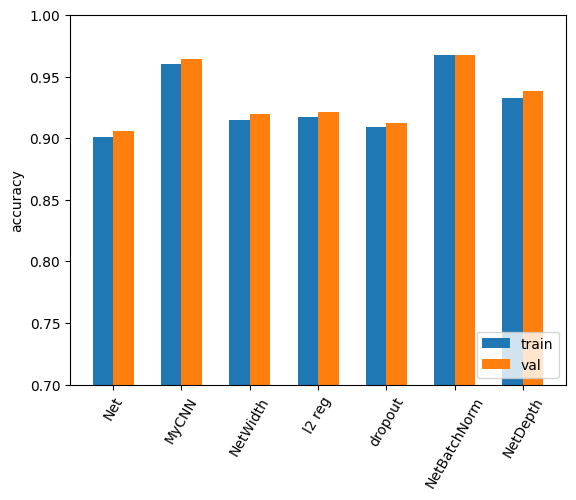

In [11]:
from utils.load_utils import compare_validations
compare_validations(current_time, all_acc_dict)